# Simple Linear Regression

In earlier classes, we used the `correlation` function to measure the strength of the linear
relationship between two variables. For most applications, knowing that such a linear
relationship exists isn’t enough. We’ll want to understand the nature of the relationship.
This is where we’ll use simple linear regression.

## The Model

Recall that we were investigating, in the context of a social network, the relationship between a user’s
number of friends and the amount of time the user spends on the site each day. Let’s
assume that you’ve convinced yourself that having more friends causes people to
spend more time on the site, rather than one of the alternative explanations we discussed.

The VP of Engagement asks you to build a model describing this relationship. Since
you found a pretty strong linear relationship, a natural place to start is a linear model.

In particular, you hypothesize that there are constants $\alpha$ (alpha) and $\beta$ (beta) such
that:

$$ \large y_i = \beta x_i + \alpha + \epsilon_i $$

where $y_i$ is the number of minutes user $i$ spends on the site daily, $x_i$ is the number of
friends user $i$ has, and $\epsilon$ is a (hopefully small) error term representing the fact that
there are other factors not accounted for by this simple model.

Assuming we’ve determined such an alpha and beta, then we make predictions simply
with:

In [1]:
def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha

How do we choose $\alpha$ and $\beta$? Well, any choice of $\alpha$ and $\beta$ gives us a
predicted output for each input $x_i$. Since we know the actual output $y_i$, we can
compute the error for each pair:

In [11]:
def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    """
    The error from predicting beta * x_i + alpha
    when the actual value is y_i
    """
    return y_i - predict(alpha, beta, x_i)

In [12]:
error(2,3,[1],[6])

TypeError: can only concatenate list (not "int") to list

What we’d really like to know is the total error over the entire dataset. But we don’t
want to just add the errors—if the prediction for $x_1$ is too high (causing negative error) and the prediction
for $x_2$ is too low (causing positive error), the errors may just cancel out.

So instead we add up the *squared* errors:

In [3]:
from typing import List
Vector = List[float]

def sum_of_sqerrors(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

In [7]:
sum_of_sqerrors(2,3,[1],[6])

1

The *least squares solution* is to choose the alpha and beta that make `sum_of_sqerrors` as small as possible.

Using calculus, the error-minimizing $\alpha$ and $\beta$ are given
by:

In [4]:
from typing import Tuple
from statistics import mean, stdev
from scipy.stats import pearsonr

def least_squares_fit(x: Vector, y: Vector) -> Tuple[float, float]:
    """
    Given two vectors x and y,
    find the least-squares values of alpha and beta
    """
    beta = pearsonr(x, y)[0] * stdev(y) / stdev(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

Without going through the exact mathematics, let’s think about why this might be a
reasonable solution. The choice of alpha simply says that when we see the average
value of the independent variable `x`, we would predict the average value of the dependent
variable `y` (to see it, consider adding to both sides of the equation `beta * mean(x)`).

The choice of `beta` means that when the input value increases by `stdev(x)` (e.g., `beta * (x + stdev(x)) = beta * x + beta * stdev(x)`), the prediction then increases by `pearsonr(x, y)[0] * stdev(y)`. In the case where `x` and `y` are perfectly correlated, a one-standard-deviation increase in `x` results in a one-standard-deviation-of-`y` increase in the prediction.
When they’re perfectly anticorrelated, the increase in `x` results in a decrease in the
prediction. And when the correlation is 0, beta is 0, which means that changes in `x`
don’t affect the prediction at all.

As usual, let’s write a quick test for this:

In [5]:
x = [i for i in range(-100, 110, 10)]
y = [3 * x_i - 5 for x_i in x]

print(f"x = {x}")
print(f"y = {y}")
print(f"alpha, beta = {least_squares_fit(x, y)}")

x = [-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y = [-305, -275, -245, -215, -185, -155, -125, -95, -65, -35, -5, 25, 55, 85, 115, 145, 175, 205, 235, 265, 295]
alpha, beta = (-5.0, 3.0)


Now it’s easy to apply this to the outlierless data about our social network users from a couple of weeks ago (week 3).

In [6]:
num_friends_good = [49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,
                   14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,
                   10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,
                   9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,
                   7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,
                   6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
                   5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,
                   3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,
                   2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                   1,1,1,1,1,1,1,1]

daily_minutes_good = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,
                     36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,
                     27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,
                     26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,
                     24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,
                     25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,
                     14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,
                     13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,
                     28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,
                     25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,
                     20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,
                     24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
print(f"alpha = {alpha}")
print(f"beta  = {beta}")

alpha = 22.947552413468976
beta  = 0.9038659456058724


This gives values of `alpha` = 22.95 and `beta` = 0.904. So our model says that we expect
a user with n friends to spend 22.95 + n * 0.904 minutes on the site each day. That is,
we predict that a user with no friends on DataSciencester would still spend about 23
minutes a day on the site. And for each additional friend, we expect a user to spend
almost a minute more on the site each day.

We will plot the prediction line to get a sense of how well the model fits the
observed data.

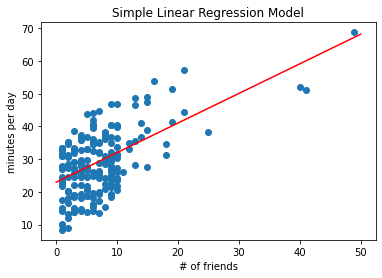

In [7]:
import matplotlib.pyplot as plt

plt.scatter(num_friends_good, daily_minutes_good)

# plot the line
x = [0, 50]
y = [beta * x_i + alpha for x_i in x]
plt.plot(x, y, color="r")

plt.title("Simple Linear Regression Model")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.show()

Of course, we need a better (more quantitative and objective) way to figure out how well we’ve fit the data than staring
at the graph. A common measure is the *coefficient of determination* (or *R-squared*),
which measures the fraction of the total variation in the dependent variable that is
captured by the model:

In [8]:
def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def total_sum_of_squares(y: Vector) -> float:
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))

def r_squared(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    """
    the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model
    """
    return 1.0 - (sum_of_sqerrors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

In [9]:
rsq = r_squared(alpha, beta, num_friends_good, daily_minutes_good)

# Alternatively, use sklearn
from sklearn.metrics import r2_score
# pass in the observed vector and the predicted vector
rsq_sk = r2_score(daily_minutes_good, [predict(alpha, beta, x_i) for x_i in num_friends_good])
r = pearsonr(daily_minutes_good, [predict(alpha, beta, x_i) for x_i in num_friends_good])[0]

# the minor difference is due to floating-point operation round-off errors
print(f"rsq    = {rsq}")
print(f"rsq_sk = {rsq_sk}")
print(f"r      = {r}")
print(f"r^2    = {r ** 2}")

rsq    = 0.3291078377836305
rsq_sk = 0.32910783778362984
r      = 0.57367921156656
r^2    = 0.3291078377836299


Recall that we chose the `alpha` and `beta` that minimized the sum of the squared prediction
errors. A linear model we could have chosen is “always predict mean(y)” (corresponding
to `alpha = mean(y)` and `beta = 0`), whose sum of squared errors exactly equals its total sum of squares. This means an R-squared of 0, which indicates a
model that (obviously, in this case) performs no better than just predicting the mean.

Clearly, the least squares model must be at least as good as that one, which means that
the sum of the squared errors is *at most* the total sum of squares, which means that
the R-squared must be at least 0. And the sum of squared errors must be at least 0,
which means that the R-squared can be at most 1.

The higher the number, the better our model fits the data. Here we calculate an *R-squared*
of 0.329, which tells us that our model is only sort of okay at fitting the data,
and that clearly there are other factors at play.

## Alternative Parameter Optimization Techniques

The problem of optimizing the parameters of the linear regression model is actually one of few optimization problems (in the context of machine learning models) that can be directly solved via calculus. That is, we can take the derivative of the `sum_of_sqerrors` function with with respect to the parameters (alpha and beta), set it to 0, and find the parameters that can minimize `sum_of_sqerrors`. The process is well established but still requires the understanding of multivariate calculus to follow the steps, and is beyond the scope of our class (you might have to revisit this topic if you are going to take Data Science II).

Now there are plenty of parameter optimization problems for various models that may not have straight-forward mathematical solutions for their minimums. Such problems may also be solved through a more general and iterative approach, for which there are many exisitng optimization algorithms (which are also usually fairly complicated and beyond the scope of our class).

We will demonstrate how to use such optimizers (minimizers) to solve for the parameters `alpha` and `beta` in the simple linear regression problem and we may use them for other problems later on in the semester.

In [10]:
from scipy.optimize import minimize

# theta = [alpha, beta]
# the objective function to be minimized must take a single array/vector containing all of its parameters
def object_fun (theta):
    return sum_of_sqerrors(theta[0], theta[1], num_friends_good, daily_minutes_good)

# initial guess of the parameters alpha and beta
theta_0 = [0, 0]

optim = minimize(object_fun, theta_0, method='BFGS')

print(alpha)
print(beta)
print(optim.x)

22.947552413468976
0.9038659456058724
[22.94755232  0.90386594]
